# **Scraping Fotmob Match Data and Creating Shotmap**

*   First of all we need FotMob match id for creating shotmap of any match.
*   We can get this match id from match page on FotMob, in the url part.
*   Here is an example match url -> https://www.fotmob.com/matches/real-madrid-vs-barcelona/2grk20#4506859
*   This match's FotMob match id is 4506859

In [57]:
# Importing libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt

Now we are at the fetching data part.
*   If you want to now how do we fetching data in more detailed way, you should learn to use this site's (https://curlconverter.com/) very useful tool.
*   If you don't want to learn how do we fetching data, you can use directly this headers and response.

In [58]:
# Here is match id, change it with your match you will create shotmap for.
matchId = 4506859

headers = {
    'accept': '*/*',
    'priority': 'u=1, i',
    'referer': 'https://www.fotmob.com/',
    'sec-ch-ua': '"Chromium";v="130", "Google Chrome";v="130", "Not?A_Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
}

response = requests.get(f"https://www.fotmob.com/api/matchDetails?matchId={matchId}", headers=headers)

In [59]:
# Converting response text to json
data = response.json()

In [60]:
# Here we defined the way of shots in json tree. If you want to see a json file as a tree map, here is another useful tool https://jsoneditoronline.org/
shotmap_path = data["content"]["shotmap"]["shots"]

In [61]:
# Now we keep the shotmap as a json structure. The following line will convert the json structure into a dataframe.
shotmap_df = pd.DataFrame(shotmap_path)

In [62]:
# Print the dataframe and see the result. Try to understand table structure.
shotmap_df

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,keeperId,firstName,lastName,fullName,teamColor,shortName
0,2739518207,AttemptSaved,8634,1467236,Lamine Yamal,89.900000,32.780000,13,None,False,...,False,"{'x': 1.6253306878306886, 'y': 0.2802840420634...",False,True,800882.0,Lamine,Yamal,Lamine Yamal,#971e48,NaN
1,2739523855,Miss,8634,696679,Raphinha,85.923529,34.533750,21,None,False,...,False,"{'x': 1.0095143973002183, 'y': 0.6772486772486...",False,False,NaN,,Raphinha,Raphinha,#971e48,NaN
2,2739524449,Miss,8633,846033,Vinicius Junior,96.219298,43.044375,22,None,False,...,False,"{'x': 0, 'y': 0.06903284596493285, 'zoomRatio'...",False,True,NaN,Vinicius,Junior,Vinicius Junior,#085098,Vinicius
3,2739527873,AttemptSaved,8634,1083323,Pedri,79.556796,46.312866,28,None,False,...,False,"{'x': 0.37466931216931143, 'y': 0.225925924814...",False,False,800882.0,,Pedri,Pedri,#971e48,NaN
4,2739528273,Miss,8634,282676,Inigo Martinez,97.184211,27.950714,29,None,False,...,False,"{'x': 1.3807371533603823, 'y': 0.6772486772486...",False,True,NaN,Inigo,Martinez,Inigo Martinez,#971e48,NaN
5,2739534925,Miss,8634,1467236,Lamine Yamal,82.822816,24.139363,37,None,False,...,False,"{'x': 0.4343903451402107, 'y': 0.6772486772486...",False,False,NaN,Lamine,Yamal,Lamine Yamal,#971e48,NaN
6,2739539819,AttemptSaved,8634,1404415,Fermin Lopez,80.119903,36.287500,43,None,True,...,False,"{'x': 0.8184523809523807, 'y': 0.3227513211640...",False,False,NaN,Fermin,Lopez,Fermin Lopez,#971e48,NaN
7,2739560641,AttemptSaved,8634,1467236,Lamine Yamal,60.938333,17.833631,51,None,False,...,False,"{'x': 1.2017195767195774, 'y': 0.3652186002645...",False,False,800882.0,Lamine,Yamal,Lamine Yamal,#971e48,NaN
8,2739560957,AttemptSaved,8633,846033,Vinicius Junior,90.100000,47.714140,52,None,True,...,False,"{'x': 1.3630952380952386, 'y': 0.3227513211640...",False,True,NaN,Vinicius,Junior,Vinicius Junior,#085098,Vinicius
9,2739562223,Goal,8634,93447,Robert Lewandowski,87.104412,31.483750,54,None,False,...,False,"{'x': 1.5849867724867723, 'y': 0.0322751321164...",False,False,800882.0,Robert,Lewandowski,Robert Lewandowski,#971e48,NaN


Now we are at the filtering player's shots part. Try to write player's name correctly, check it on 'playerName' column.

In [63]:
selected_player = "Robert Lewandowski"
selected_player_shots = shotmap_df[shotmap_df['playerName'] == selected_player] # Filtering
selected_player_shots # Print and see result

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,keeperId,firstName,lastName,fullName,teamColor,shortName
9,2739562223,Goal,8634,93447,Robert Lewandowski,87.104412,31.483750,54,None,False,...,False,"{'x': 1.5849867724867723, 'y': 0.0322751321164...",False,False,800882.0,Robert,Lewandowski,Robert Lewandowski,#971e48,NaN
11,2739564049,Goal,8634,93447,Robert Lewandowski,96.798246,36.440000,56,None,False,...,False,"{'x': 1.806878306878306, 'y': 0.06455026423280...",False,True,800882.0,Robert,Lewandowski,Robert Lewandowski,#971e48,NaN
15,2739571243,Post,8634,93447,Robert Lewandowski,95.736842,30.950000,66,None,False,...,False,"{'x': 1.9936507936507937, 'y': 0.0220829851322...",False,True,NaN,Robert,Lewandowski,Robert Lewandowski,#971e48,NaN
16,2739572243,Miss,8634,93447,Robert Lewandowski,98.052632,26.774048,68,None,False,...,False,"{'x': 1.3116791014338367, 'y': 0.6772486772486...",False,True,NaN,Robert,Lewandowski,Robert Lewandowski,#971e48,NaN


Now we did get player's shots as a dataframe so we can do whatever we want on this filtered data. Let's try to see the shots on a pitch.

For pitch visualization I will use mplsoccer library. First install it if you don't have this library.

In [ ]:
pip install mplsoccer

Here I imported VerticalPitch because i wanted to a vertical viz but if you want to see it horizontally, you should import like this: "from mplsoccer import Pitch".

In [65]:
from mplsoccer import VerticalPitch

Pitch customization part

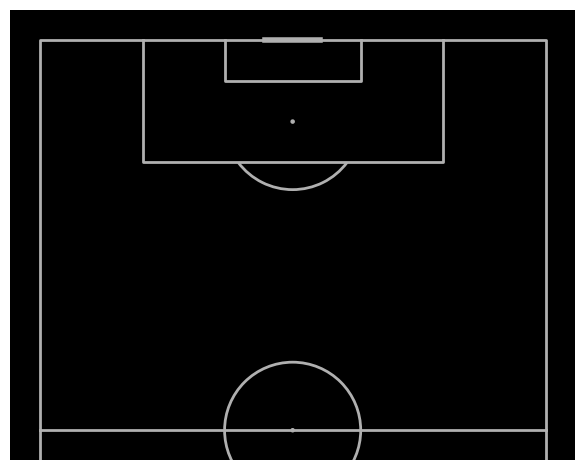

In [66]:
pitch = VerticalPitch(pitch_type='uefa', half=True) # Set 'half=True' because we are working on one team's shots and we should work on half pitch
fig, ax = pitch.draw()
ax.set_facecolor('black') # You can also use a hex color code like #121212
#fig.set_facecolor('black') # If you want complete black color as bg, this one will remove white border

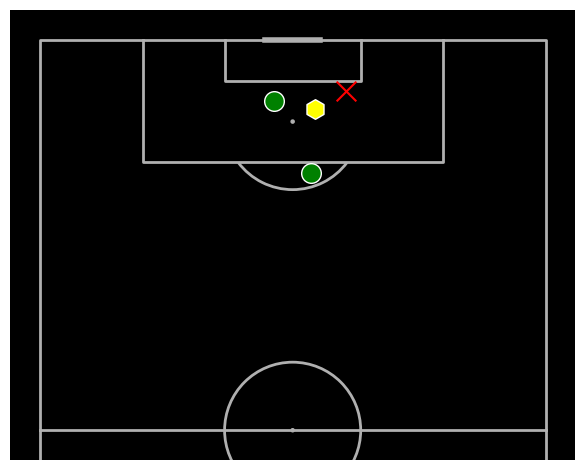

In [67]:
# Drawing shot locations of selected player
# For analyze every shot player taken, we use a for loop
# We are filtering shot result, defining shot results as different markers and different colors

for i in range(len(selected_player_shots)):

  if selected_player_shots['eventType'].iloc[i] == "Goal":
    pitch.scatter(selected_player_shots['x'].iloc[i], selected_player_shots['y'].iloc[i], marker='o', s=200, edgecolor='white', facecolor='green', ax=ax)

  elif selected_player_shots['eventType'].iloc[i] == "AttemptSaved":
    pitch.scatter(selected_player_shots['x'].iloc[i], selected_player_shots['y'].iloc[i], marker='s', s=200, edgecolor='white', facecolor='green', ax=ax)

  elif selected_player_shots['eventType'].iloc[i] == "Post":
    pitch.scatter(selected_player_shots['x'].iloc[i], selected_player_shots['y'].iloc[i], marker='h', s=200, edgecolor='white', facecolor='yellow', ax=ax)

  elif selected_player_shots['eventType'].iloc[i] == "Miss":
    pitch.scatter(selected_player_shots['x'].iloc[i], selected_player_shots['y'].iloc[i], marker='x', s=200, edgecolor='red', facecolor='red', ax=ax)

  else:
    pitch.scatter(selected_player_shots['x'].iloc[i], selected_player_shots['y'].iloc[i], marker='?', s=200, edgecolor='white', facecolor='white', ax=ax)
fig

After that for more customization we can add other infos like match name, league name, player image etc.

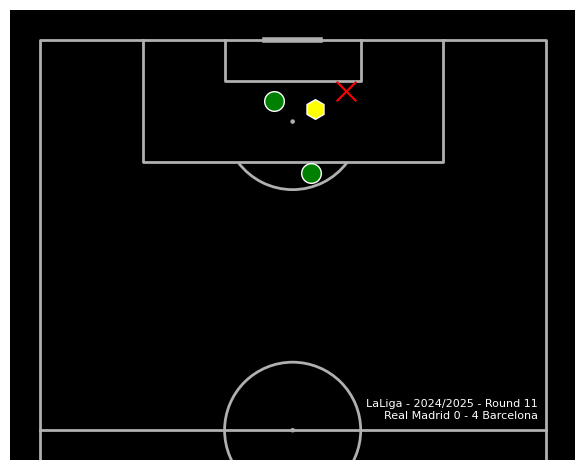

In [68]:
# Getting match title for using it on plot title
# We will use 'data' variable again we fetched at the beginning of script, we know it's in json structure.
# Finding and defining this variables in json structure may be confusing if you doing it for the first time but after a while it will be more enjoyable

league_name = data['general']['leagueName']
season_name = data['general']['parentLeagueSeason']
round_name = data['general']['leagueRoundName']
home_team_name = data['general']['homeTeam']['name']
away_team_name = data['general']['awayTeam']['name']
score_str = data['header']['status']['scoreStr']

match_title = f"{league_name} - {season_name} - {round_name}\n{home_team_name} {score_str} {away_team_name}" # Creating a title with match infos we collected from json

pitch.annotate(match_title, (54,1), ax=ax, fontsize=8, color='white', ha='right')
fig

In [69]:
# Now we will try to show player image and another title
# For importing image we will send a request again to Fotmob
# Firstly import packages for image process

from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [70]:
player_id = selected_player_shots['playerId'].iloc[-1] # Get player id from player's shots dataframe
player_name = selected_player_shots['playerName'].iloc[-1] # Get player name from player's shots dataframe

image_request_url = f"https://images.fotmob.com/image_resources/playerimages/{player_id}.png" # Fotmob stores player images with this url, for example -> https://images.fotmob.com/image_resources/playerimages/93447.png
image_response = requests.get(image_request_url)
img = Image.open(BytesIO(image_response.content)).convert('RGBA') # After getting response from url, we converting response's content to image for matplotlib

# I prefer AnnotationBbox to insert an image into a Matplotlib plot, but there are other methods of course (like imshow)
imagebox = OffsetImage(img, zoom=0.2)
ab = AnnotationBbox(imagebox, (4, 62), frameon=False)
ax.add_artist(ab)

In [71]:
# Now adding player name next to player image
player_title = f"{player_name}\nShotmap"
pitch.annotate(player_title, (59,8), ax=ax, fontsize=8, color='white', ha='right', weight='bold')

Text(8, 59, 'Robert Lewandowski\nShotmap')

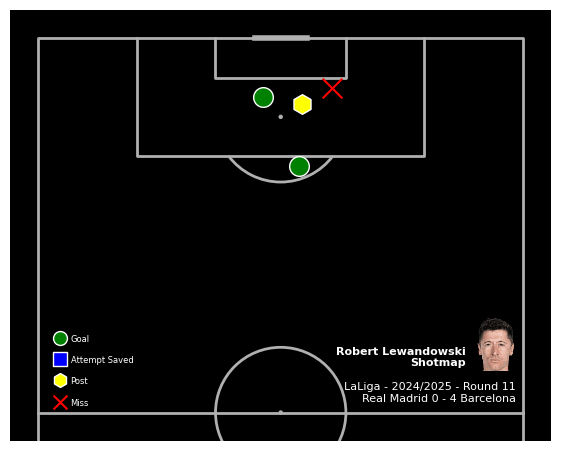

In [72]:
# Lastly adding what markers on the pitch meaning

#Defining goal marker
pitch.scatter(63,65, marker='o', s=100, edgecolor='white', facecolor='green', ax=ax)
pitch.annotate("Goal", (62.8,63.5), ax=ax, fontsize=6, color='white', ha='left', va='center')

#Defining attempt saved marker
pitch.scatter(60, 65, marker='s', s=100, edgecolor='white', facecolor='blue', ax=ax)
pitch.annotate("Attempt Saved", (59.8,63.5), ax=ax, fontsize=6, color='white', ha='left', va='center')

#Defining post marker
pitch.scatter(57, 65, marker='h', s=100, edgecolor='white', facecolor='yellow', ax=ax)
pitch.annotate("Post", (56.8,63.5), ax=ax, fontsize=6, color='white', ha='left', va='center')

#Defining miss marker
pitch.scatter(54, 65, marker='x', s=100, edgecolor='red', facecolor='red', ax=ax)
pitch.annotate("Miss", (53.8,63.5), ax=ax, fontsize=6, color='white', ha='left', va='center')

fig

In [19]:
# If you want to save this plot with selected player's name, use following lines
# get_player_name = selected_player_shots['playerName'].iloc[-1]
# get_player_name = get_player_name.replace(" ", "_")
# file_name = f"{get_player_name}_Shotmap.png"
# plt.savefig(file_name, bbox_inches=tight_layout, dpi=300)